# loading libraries 

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sys
import h5py
import h5pyd
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import numpy as np
numsimp=int(30000/100)
lowpass_filter = signal.butter(1,Wn=0.001,btype='low',output='sos')

# reading data 

In [2]:
f=h5py.File('/home/othmanekada/DATA/ara.h5', 'r') 
das = np.array(f['das'])

In [3]:
list(f)

['channel', 'crs', 'das', 't', 'trace', 'x', 'y', 'z']

# drawing  the signal every 50 chanel !

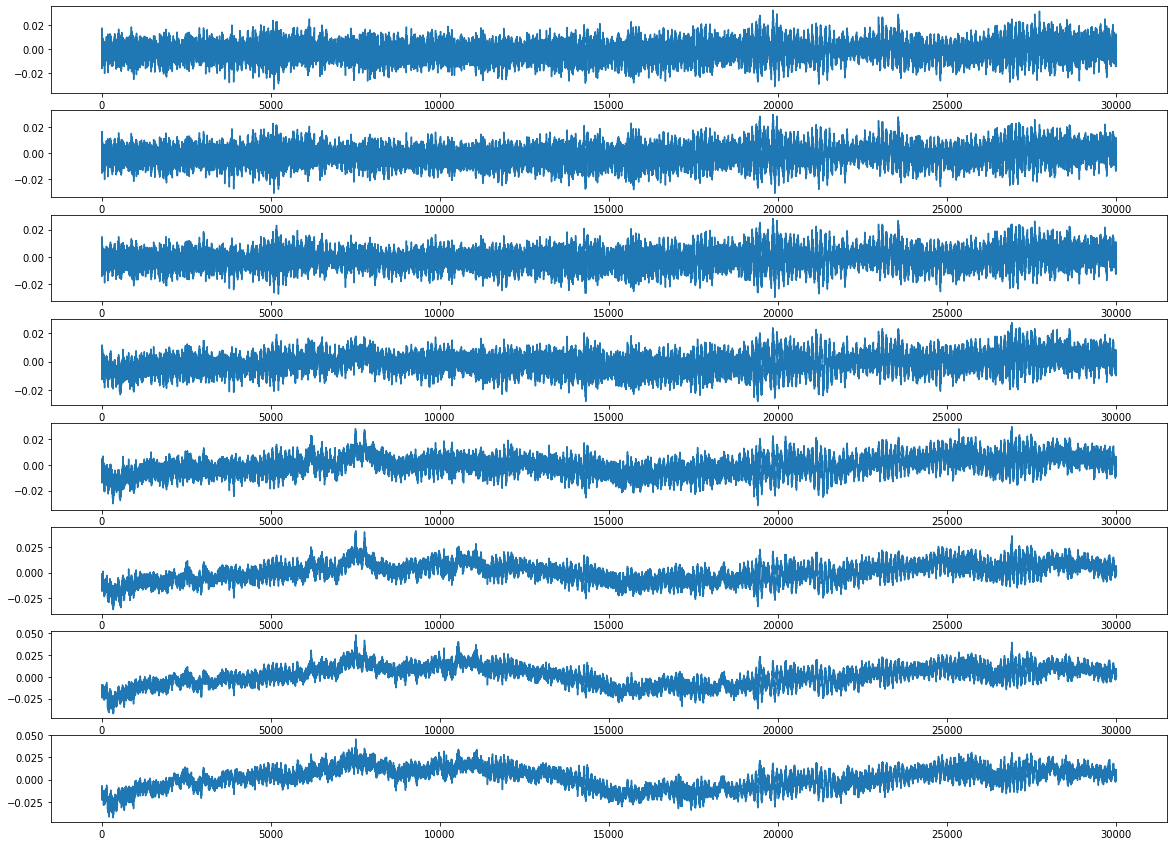

In [4]:
steps=50
fig, axes = plt.subplots(len(list(range(0, len(das[0]),steps))),figsize=(20,15))
for i in range(len(list(range(0, len(das[0]),steps)))):
    axes[i].plot(das[:,i])
plt.show()

# aplliying a low pass filter on the signal signal !

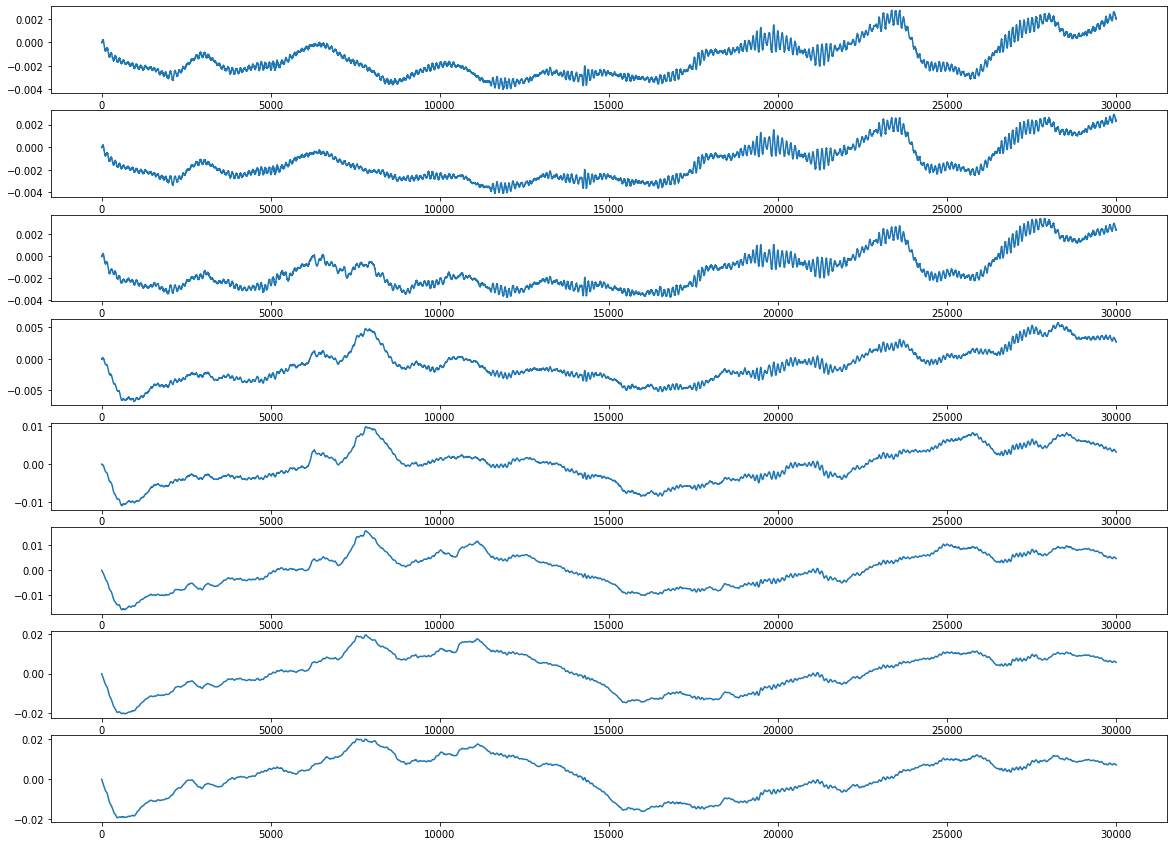

In [5]:
fig, axes = plt.subplots(len(list(range(0, len(das[0]),steps))),figsize=(20,15))
for i in range(len(list(range(0, len(das[0]),steps)))):
    axes[i].plot(signal.sosfilt(lowpass_filter, das[:,i]))
plt.show()

# down simpling the signal into a lower freaqency

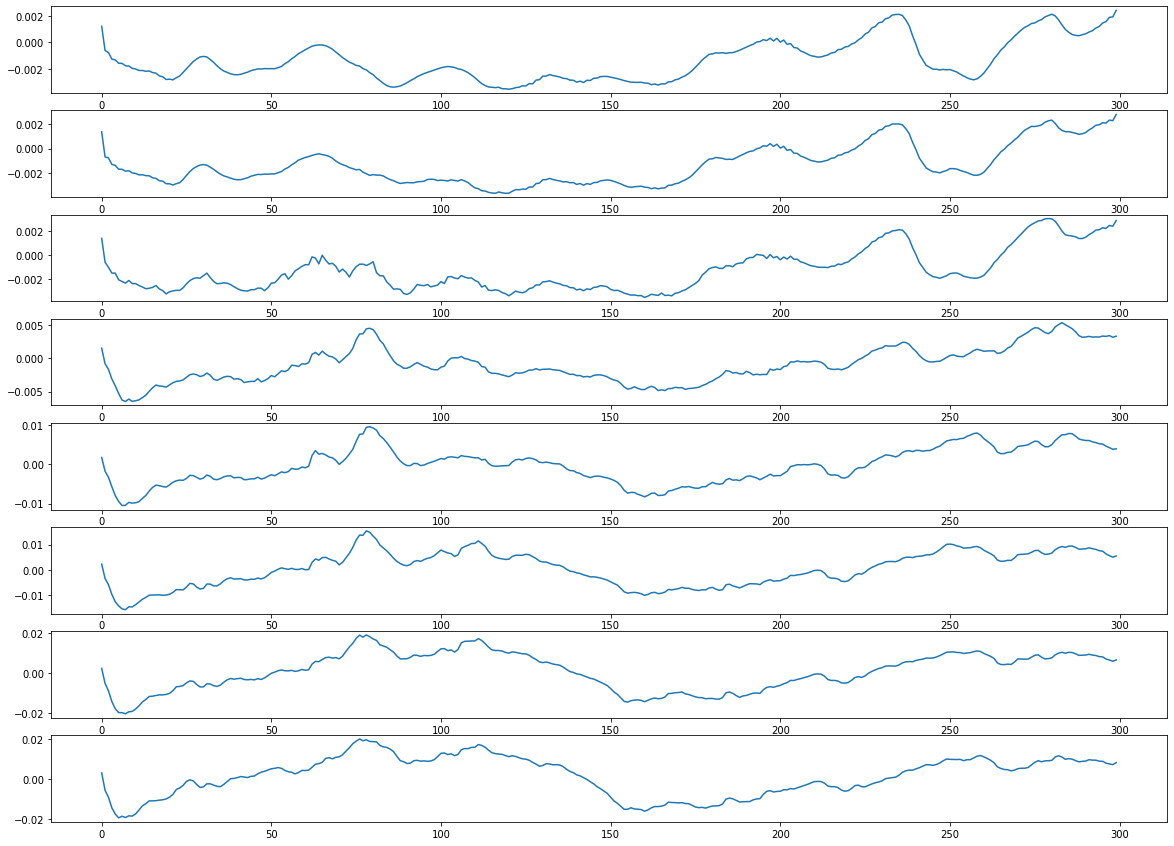

In [11]:
fig, axes = plt.subplots(len(list(range(0, len(das[0]),steps))),figsize=(20,15))
for i in range(len(list(range(0, len(das[0]),steps)))):
    axes[i].plot(signal.resample(signal.sosfilt(lowpass_filter, das[:,i]),numsimp))
plt.show()

# feature extraction by  power spectral density 

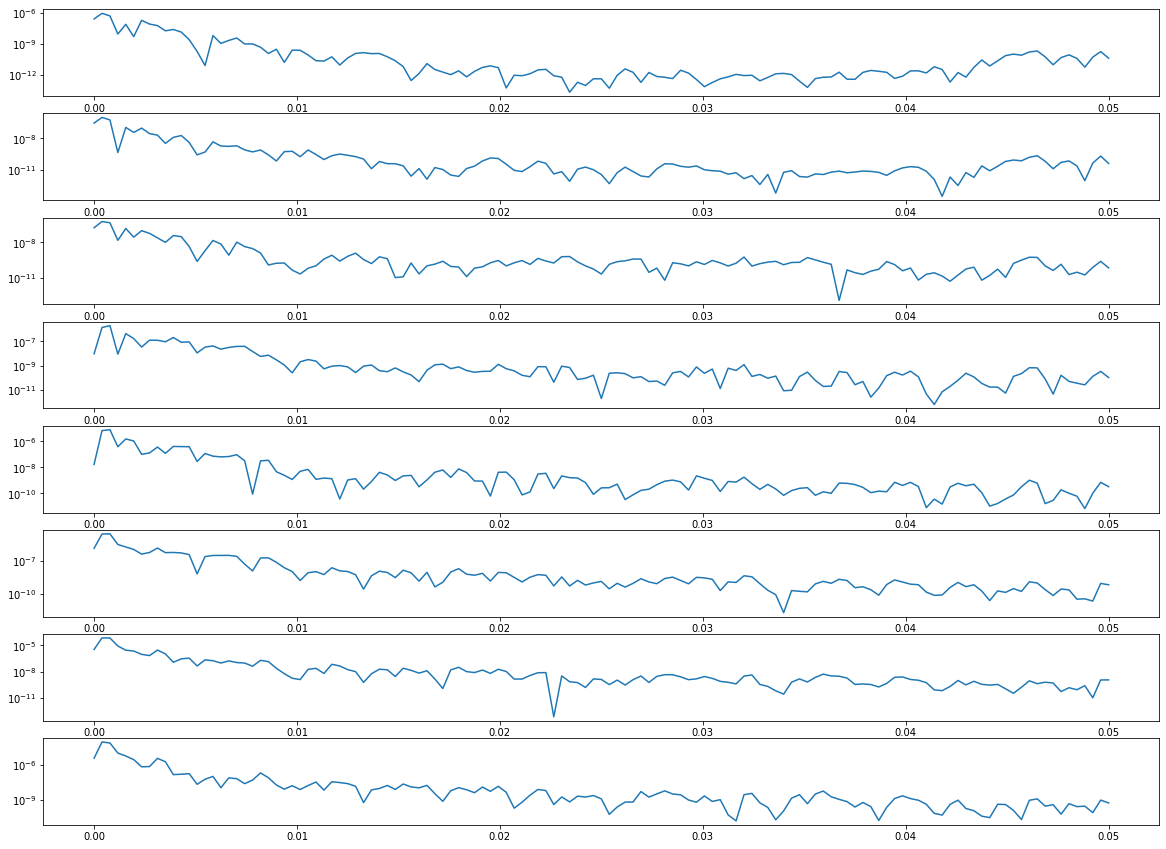

In [106]:
filtred_data=[]
fig, axes = plt.subplots(len(list(range(0, len(das[0]),steps))),figsize=(20,15))
for i in range(len(list(range(0, len(das[0]),steps)))):
    a, b = signal.welch(signal.resample((signal.sosfilt(lowpass_filter, das[:,i])),int(numsimp)), fs=0.1, scaling='spectrum')
    axes[i].semilogy(a,b)
    filtred_data.append(b)
plt.show()

# appliying dimension reduction to see how much the data is leanary separable

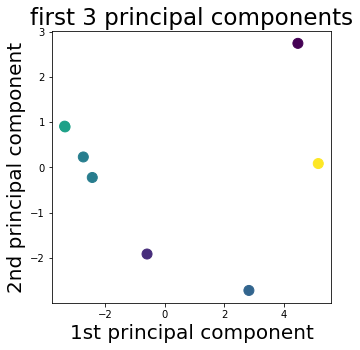

In [227]:
scaler= sk.preprocessing.MinMaxScaler()
dataset_scaled = scaler.fit_transform(filtred_data)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(dataset_scaled)
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(pca_result[:, 0], pca_result[:, 1], c=pca_result[:, 2],s=100)
ax.set_xlabel('1st principal component', fontsize=20)
ax.set_ylabel('2nd principal component', fontsize=20)
ax.set_title('first 3 principal components', fontsize=23)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [228]:
pca_result

array([[-3.36694936,  0.91216565,  0.55664689],
       [-3.35279475,  0.89582568,  0.55140567],
       [-2.73803029,  0.23020178, -0.02356386],
       [-2.43662984, -0.2240814 , -0.0328091 ],
       [-0.59353845, -1.91871349, -1.19351855],
       [ 2.83488512, -2.72506901, -0.42029092],
       [ 5.16927609,  0.08436699,  2.24815716],
       [ 4.48378148,  2.74530381, -1.68602729]])

# appliying density based clustering 

In [224]:
clustering = DBSCAN(eps=0.01, min_samples=1).fit(pca_result)
print('number of classes: ',len(clustering.labels_))
clustering.labels_

number of classes:  8


array([0, 1, 2, 3, 4, 5, 6, 7])

# same etapes for all chanels (384)

In [239]:
%%timeit
filtred_data=[]
for i in range(len(list(range(0, len(das[0]))))):
    a, b = signal.welch(signal.resample((signal.sosfilt(lowpass_filter, das[:,i])),int(numsimp)), fs=0.1, scaling='spectrum')
    filtred_data.append(b)
np.unique(DBSCAN(eps=0.05, min_samples=1).fit(pca.fit_transform(scaler.fit_transform(filtred_data))).labels_)

419 ms ± 4.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
